<a href="https://colab.research.google.com/github/nkgupta16/AAI_LAB1/blob/main/AAI_LAB1(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Практическое задание № 1. Классификация


**Работу выполнил (а):**

Гупта Нилеш Кумар, 374371, Прик ИИ R23 бак 2.3

# Распознавание активности человека на основе данных с мобильных сенсоров

Необходимо по данным с мобильных сенсоров при помощи прикладных алгоритмов машинного обучения предсказать активность человека по шести классам движений:
* Движется по прямой
* Движется вверх (например, движение по лестнице вверх)
* Движется вниз (например, движение по лестнице вниз)
* Сидит
* Стоит
* Лежит


## Сведения о наборе данных
Набор данных содержит записи датчиков со сматфонов (акселерометр и гироскоп с частотой дискретизации 50 Гц) от 30 участников, выполняющих следующие действия: ходьба, ходьба по лестнице, ходьба по лестнице, сидение, стояние и лежание. Данные были предварительно обработаны при помощи фильтров шума. Набор данных представлен Хорхе Л. Рейес-Ортисом.

Признаки были извлечены из 3-х осевых необработанных сигналов акселерометра и гироскопа tAcc-XYZ и tGyro-XYZ. Эти сигналы были сняты с постоянной частотой 50 Гц. Затем были отфильтрованны с помощью медианного фильтра и низкочастотного фильтра Баттерворта 3-го порядка с частотой 20 Гц для удаления шумов. Аналогичным образом сигнал ускорения был разделен на сигналы ускорения тела и гравитации (`tBodyAcc-XYZ` и `tGravityAcc-XYZ`) с помощью другого низкочастотного фильтра Баттерворта с угловой частотой 0,3 Гц. Линейное ускорение тела и угловая скорость были использованы для получения сигналов "рывка" — (`tBodyAccJerk-XYZ` и `tBodyGyroJerk-XYZ`). Также величина этих трехмерных сигналов была расчитана с использованием евклидовой нормы — (`tBodyAccMag`, `tGravityAccMag`, `tBodyAccJerkMag`, `tBodyGyroMag`, `tBodyGyroJerkMag`).


Наконец, к некоторым из этих сигналов было применено быстрое преобразование Фурье (БПФ), в результате чего получились `fBodyAcc-XYZ`, `fBodyAccJerk-XYZ`, `fBodyGyro-XYZ`, `fBodyAccJerkMag`, `fBodyGyroMag`, `fBodyGyroJerkMag`. (Обратите внимание на "f" для обозначения сигналов в частотной области).


Набор переменных, которые были оценены по этим сигналам, следующий:
* mean(): Среднее значение
* std(): Стандартное отклонение
* mad(): Среднее абсолютное отклонение
* max(): Наибольшее значение в массиве
* min(): Наименьшее значение в массиве
* sma(): Область величины сигнала
* energy(): Мера энергии. Сумма квадратов, деленная на количество значений.
* iqr(): Интерквартильный размах
* entropy(): Энтропия сигнала
* arCoeff(): Коэффициенты авторегрессии с порядком Burg, равным 4
* correlation(): коэффициент корреляции между двумя сигналами
* maxInds(): индекс частотной составляющей с наибольшей величиной
* meanFreq(): средневзвешенное значение частотных компонент для получения средней частоты
* skewness(): перекос сигнала в частотной области
* kurtosis(): эксцесс сигнала в частотной области
* bandsEnergy(): Энергия частотного интервала в пределах 64 бинов БПФ каждого окна.
* angle(): Угол между векторами.





## Импорт библиотек
Первым делом импортируем необходимые библиотеки для работы с данными:

In [ ]:
# Basic utilities
import os
import numpy as np
import pandas as pd

# Machine Learning models
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Model evaluation
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, GridSearchCV

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Make plots better
sns.set()


## Считываем набор данных

В прикладных задачах машинного обучения очень важен процесс извлечения признаков (feature extraction), в ходе которого данные интерпретируются в информативные признаки. Также этот процесс может называться проектирование признаков (feature engineering), это весьма трудоемкая и творческая задача. В рамках работы мы опустим эту часть и воспользуемся предобработанными данными.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data_path = '/content/drive/MyDrive/ColabNotebooks'

In [ ]:
def read_data(path, filename):
    return pd.read_csv(os.path.join(path, filename))

df = read_data(data_path, 'train.csv')
df.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


Теперь, загрузим полный набор данных и сохранить его под следующими четырьмя переменными:

* `train_X`: признаки, используемые для обучения модели
* `train_y`: метки, используемые для обучения модели
* `test_X`: признаки, используемые для проверки модели
* `test_y`: метки, используемые для проверки модели

In [ ]:
def load_dataset(label_dict):
  #loading dataframe
    train_df = read_data(data_path, 'train.csv')
    test_df  = read_data(data_path, 'test.csv')

    train_X = read_data(data_path, 'train.csv').values[:,:-2]
    test_X = read_data(data_path, 'test.csv').values[:,:-2]

    # Converting Activity text labels into numbers
    train_y = train_df['Activity'].map(label_dict).values
    test_y  = test_df['Activity'].map(label_dict).values

    return train_X, train_y, test_X, test_y

label_dict = {'WALKING':0, 'WALKING_UPSTAIRS':1, 'WALKING_DOWNSTAIRS':2, 'SITTING':3, 'STANDING':4, 'LAYING':5}
train_X, train_y, test_X, test_y = load_dataset(label_dict)

print("train_X shape:", train_X.shape)
print("train_y shape:", train_y.shape)
print("test_X shape:", test_X.shape)
print("test_y shape:", test_y.shape)
print("Unique labels in train:", set(train_y))
print("Unique labels in test:", set(test_y))

train_X shape: (7352, 561)
train_y shape: (7352,)
test_X shape: (2947, 561)
test_y shape: (2947,)
Unique labels in train: {np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5)}
Unique labels in test: {np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5)}


## Выбор модели

Импортируйте выбранную вами модель из библиотеки `sklearn` и инициализируйте её в объект `model`:

Также необходимо выбрать **несколько** моделей ML для сравнения полученных результатов.

In [ ]:
models = {
    "LogisticRegression": LogisticRegression(
        C=1.0,          # regularization strength (smaller => stronger regularization)
        penalty="l2",
        solver="lbfgs",
        max_iter=5000,
        random_state=42,
        n_jobs=-1
    ),
    "KNN": KNeighborsClassifier(
        n_neighbors=10,   # k
        weights="uniform",
        n_jobs=-1
    ),
    "RandomForest": RandomForestClassifier(
        n_estimators=100,    # number of trees
        max_depth=None,
        min_samples_leaf=1,
        random_state=42,
        n_jobs=-1
    ),
    "SVM": SVC(
        C=1.0,
        kernel="rbf",
        gamma="scale",
        probability=False,   # True if need predict_proba (slower)
        random_state=42
    )
}

In [ ]:
from sklearn.preprocessing import StandardScaler
pipelines = {
    "LogisticRegression": Pipeline([("scaler", StandardScaler()), ("clf", models["LogisticRegression"])]),
    "KNN": Pipeline([("scaler", StandardScaler()), ("clf", models["KNN"])]),
    "RandomForest": Pipeline([("clf", models["RandomForest"])]),   # tree-based models don't need scaling
    "SVM": Pipeline([("scaler", StandardScaler()), ("clf", models["SVM"])])
}

In [ ]:
models = pipelines

Опишите вашу мотивацию по выбору модели. Какие гиперпараметры есть у выбранной вами модели? За что они отвечают? На что влияют?


## **Logistic Regression**

A simple linear model, fast, and a good baseline. Works well when classes are roughly linearly separable in feature space.

**Hyperparameters:**  
- **C** — inverse of regularization strength.  
  - Small C → stronger regularization → prevents overfitting  
  - Large C → weaker regularization → more flexible model  
- **penalty** — typically **l2**; **l1** can perform feature selection (sparse weights).  
- **max_iter** — increase if the solver does not converge.


---

## **k-Nearest Neighbors (KNN)**

Very intuitive and non-parametric. Good for quick sanity checks. Can be slow on large datasets because it compares distances to all training points.

**Hyperparameters:**  
- **n_neighbors (k)** — number of neighbors.  
  - Small k → flexible but noisy  
  - Large k → smoother but may underfit  
- **weights** —  
  - **uniform** (all neighbors count equally)  
  - **distance** (closer neighbors have more influence)  
- Distance metric matters if changed from default — features must be scaled.


---

## **Random Forest**
  
Strong and robust model for tabular data. Handles nonlinear relationships and provides feature importance.

**Hyperparameters:**  
- **n_estimators** — number of trees.  
  - More trees → better performance but slower  
- **max_depth** — limits tree depth.  
  - Smaller depth → less overfitting  
- **min_samples_leaf** — minimum samples at a leaf node.  
  - Larger values → more regularization  
- **n_jobs** — number of CPU cores to use in parallel.


---

## **SVM (Support Vector Machine, RBF kernel)**
  
Powerful for moderate-sized datasets. Can model complex decision boundaries using kernel tricks.

**Hyperparameters:**  
- **C** — controls tradeoff between margin width and errors.  
  - Large C → fewer training errors → risk of overfitting  
  - Small C → wider margin → better generalization  
- **kernel** — **rbf** is standard for non-linear problems.  
- **gamma** — controls how far influence of a single point reaches (RBF).  
  - Large gamma → complex, flexible boundary  
  - Small gamma → smoother, simpler boundary  






## Обучение модели

Обучите модель, используя признаки из обучающего набора (`train_X`) и метки в качестве базовой истины (`train_y`).

In [ ]:
trained_models = {}

for name, model in models.items():
    print(f"\n========================")
    print(f"Training model: {name}")
    print("========================")
    model.fit(train_X, train_y)
    trained_models[name] = model
    print(f"Finished training: {name}")


Training model: LogisticRegression
Finished training: LogisticRegression

Training model: KNN
Finished training: KNN

Training model: RandomForest
Finished training: RandomForest

Training model: SVM
Finished training: SVM


## Оценка модели
Используйте обученную модель для прогнозирования активности движения, используя признаки из тестового набора (`test_X`). Прогнозы сохраните в списке `yhat`.

In [ ]:
activities = ['Walking','Walking Upstairs','Walking Downstairs','Sitting','Standing','Laying']
results = {}

for name, mdl in trained_models.items():
    print(f"\n=== Evaluating: {name} ===")
    yhat = mdl.predict(test_X)
    results[name] = yhat

    # Print classification report
    print(classification_report(
        test_y, yhat,
        target_names=activities
    ))


=== Evaluating: LogisticRegression ===
                    precision    recall  f1-score   support

           Walking       0.95      0.99      0.97       496
  Walking Upstairs       0.97      0.94      0.96       471
Walking Downstairs       0.99      0.96      0.98       420
           Sitting       0.98      0.88      0.92       491
          Standing       0.90      0.98      0.94       532
            Laying       1.00      1.00      1.00       537

          accuracy                           0.96      2947
         macro avg       0.96      0.96      0.96      2947
      weighted avg       0.96      0.96      0.96      2947


=== Evaluating: KNN ===
                    precision    recall  f1-score   support

           Walking       0.85      0.98      0.91       496
  Walking Upstairs       0.91      0.92      0.91       471
Walking Downstairs       0.96      0.78      0.86       420
           Sitting       0.89      0.83      0.86       491
          Standing       0.86  

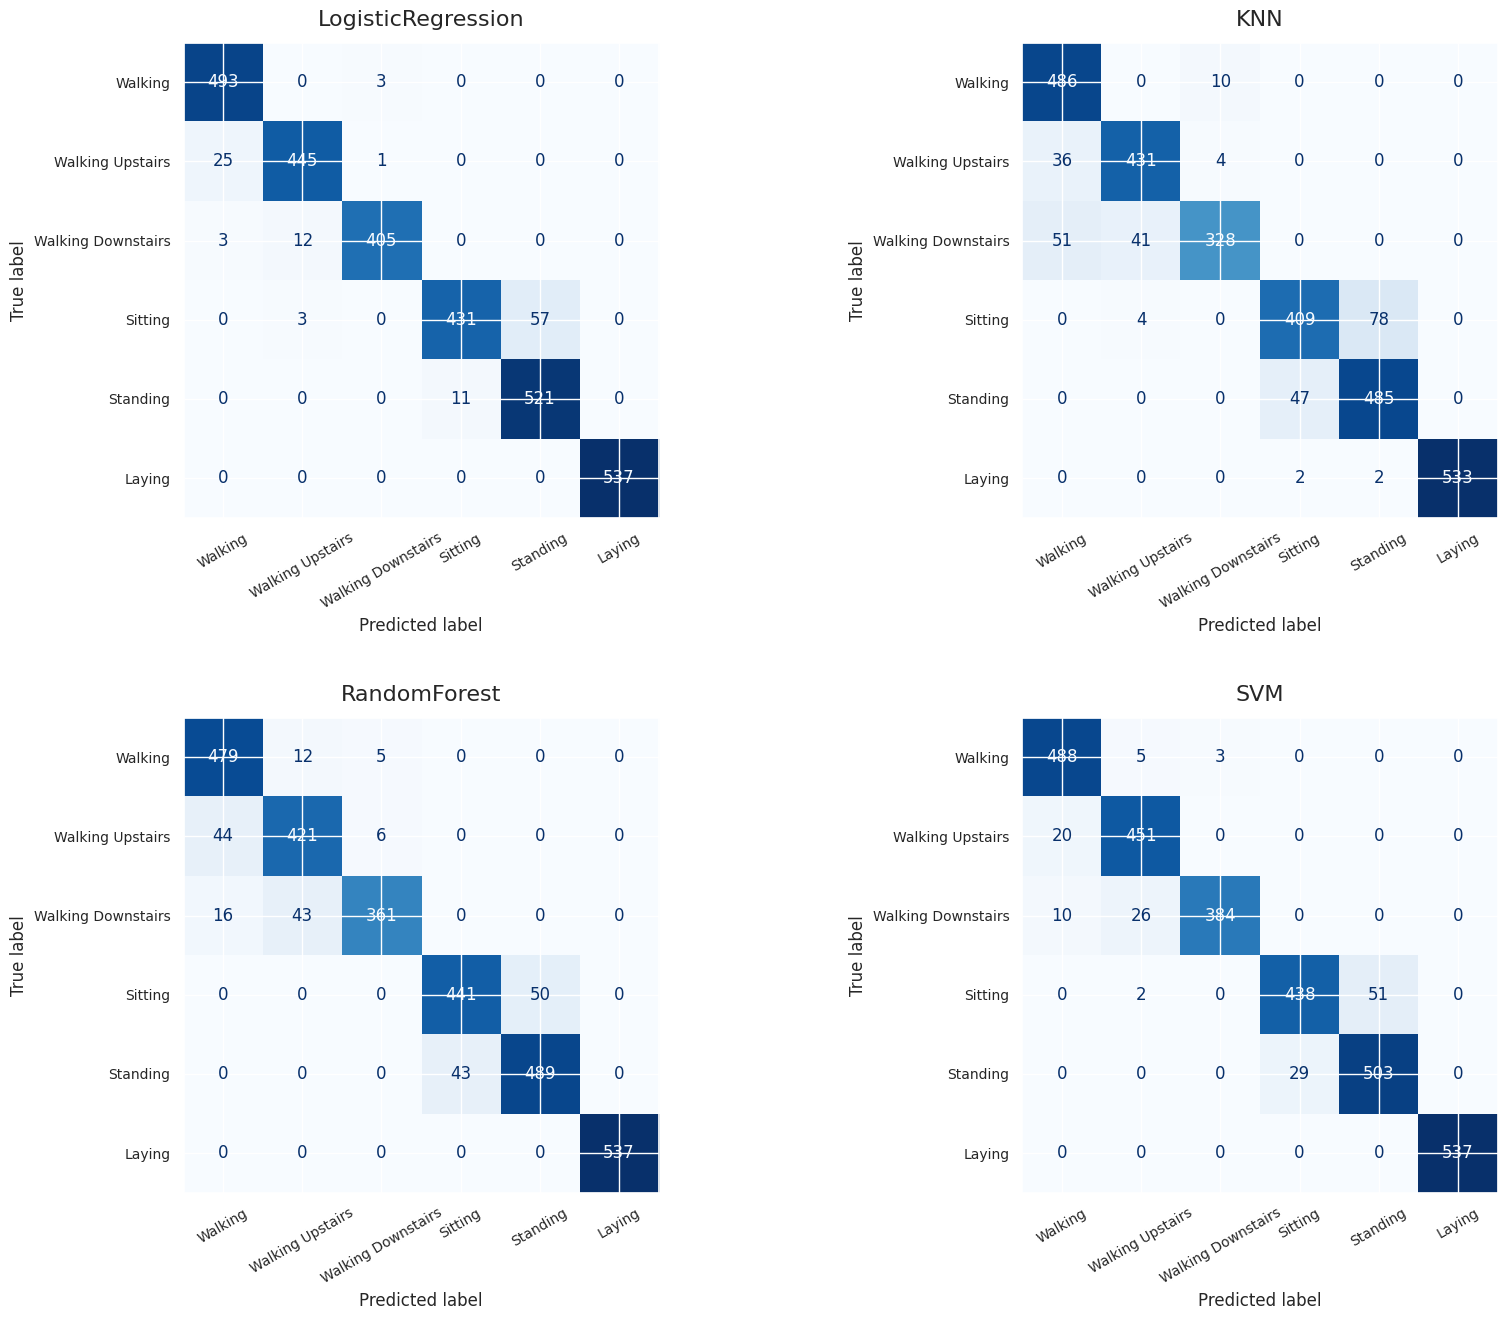

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(18, 14))
axes = axes.flatten()

for ax, (name, mdl) in zip(axes, trained_models.items()):
    yhat = mdl.predict(test_X)
    cm = confusion_matrix(test_y, yhat)

    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=activities)
    disp.plot(
        cmap="Blues",
        values_format="d",
        ax=ax,
        colorbar=False
    )

    ax.set_title(f"{name}", fontsize=16, pad=12)
    ax.tick_params(axis='x', rotation=30)
    ax.tick_params(labelsize=10)
plt.tight_layout(pad=3.0)
plt.show()


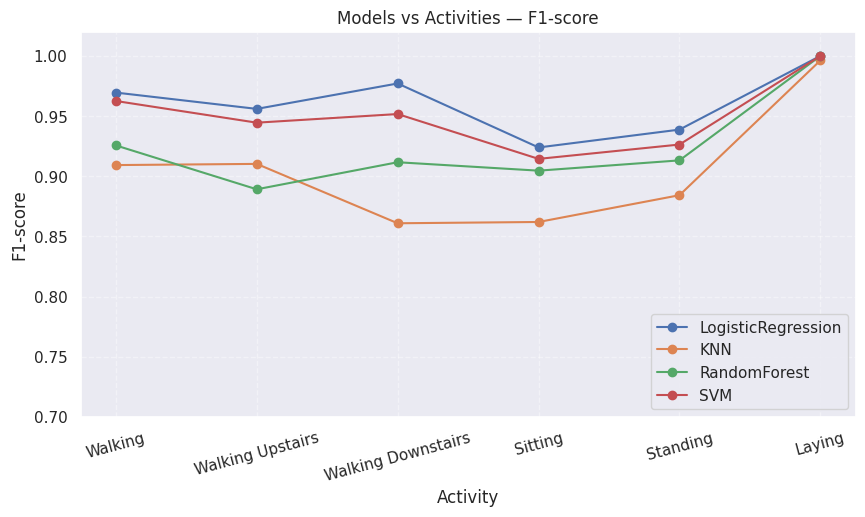

,LogisticRegression,KNN,RandomForest,SVM
Walking,0.970,0.909,0.926,0.963
Walking Upstairs,0.956,0.910,0.889,0.945
Walking Downstairs,0.977,0.861,0.912,0.952
Sitting,0.924,0.862,0.905,0.914
Standing,0.939,0.884,0.913,0.926
Laying,1.000,0.996,1.000,1.000


In [ ]:
# build F1 table
f1 = {}
for name, mdl in trained_models.items():
    rpt = classification_report(test_y, mdl.predict(test_X), target_names=activities, output_dict=True)
    f1[name] = [rpt[a]['f1-score'] for a in activities]

f1_df = pd.DataFrame(f1, index=activities)

plt.figure(figsize=(10,5))
for col in f1_df.columns:
    plt.plot(f1_df.index, f1_df[col], marker='o', label=col)
plt.ylim(0.7,1.02)
plt.ylabel('F1-score'); plt.xlabel('Activity')
plt.title('Models vs Activities — F1-score')
plt.grid(alpha=0.4, linestyle='--')
plt.legend(loc='lower right')
plt.xticks(rotation=15)
plt.show()
# table
f1_df.round(3)


In [ ]:
# Accuracy for all models
from sklearn.metrics import accuracy_score

accuracies = {}

for name, model in trained_models.items():
    yhat = model.predict(test_X)
    accuracies[name] = accuracy_score(test_y, yhat)

rounded_accuracies = {name: round(score, 2) for name, score in accuracies.items()}
print(rounded_accuracies)

{'LogisticRegression': 0.96, 'KNN': 0.91, 'RandomForest': 0.93, 'SVM': 0.95}


## Таблица сравнения моделей

| Модель | Точность (Accuracy) | Комментарий |
|--------|----------------------|--------------|
| **Logistic Regression** | ~0.96 | Лучший результат. Отлично классифицирует все виды активности, небольшая путаница между «Сидит» и «Стоит». |
| **SVM (RBF)** | ~0.95 | Очень сильная модель. Хорошо разделяет классы, небольшая путаница между «Сидит» и «Стоит». |
| **Random Forest** | ~0.93 | Высокая точность, но сильнее путает подъём/спуск по лестнице и «Сидит/Стоит». |
| **KNN** | ~0.91 | Самая низкая точность. Страдает из-за высокой размерности признаков и природы алгоритма (distance-based). |


## Краткая интерпретация результатов

Все модели показали высокое качество классификации активности человека по данным акселерометра и гироскопа.  
Лучше всего с задачей справилась **Logistic Regression** — данные хорошо разделяются линейно после масштабирования.  
**SVM** показал почти такой же уровень точности.  
**Random Forest** показал надёжный, но чуть более слабый результат, особенно на близких по сигналу классах.  
**KNN** ожидаемо уступил из-за чувствительности к размерности (561 признак).

Общей сложностью для всех моделей остаётся различение состояний **«Сидит»** и **«Стоит»**, так как их сигналы очень похожи.  
Класс **«Лежит»** определяется практически идеально — он имеет очень стабильный и характерный паттерн.


## Итоговый вывод

Лучшие результаты показали линейные и квазилинейные модели (**Logistic Regression** и **SVM**), что подтверждает их эффективность для задач распознавания активности по сенсорным данным.  
Все модели хорошо определяют динамические виды активности (ходьба, подъём/спуск по лестнице) и особенно уверенно — состояние покоя «Лежит».  
Эксперимент демонстрирует важность масштабирования признаков, выбора подходящего алгоритма и анализа метрик качества при построении систем HAR (Human Activity Recognition).